In [9]:
import csv

with open("val_new_format.csv","w",newline="") as f:
    csvWrite = csv.writer(f)
    with open("val_new.csv","r") as f1:
        csvObj = csv.reader(f1)
        for line in csvObj:
            lineEdit = []
            app = False
            for i in range(len(line)):
                if (i-1) % 5:
                    lineEdit.append(line[i])
                else:
                    if i != 1:
                        lineEdit.append(cl)
                        cl = line[i]
                    else:
                        cl = line[i]
            lineEdit.append(cl)
            csvWrite.writerow(lineEdit)

In [5]:
import torch
import torch.nn as nn

img = torch.randn((1,480,24,24))
conv = nn.Conv2d(480, 480, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=480, bias=False)
hswish = nn.Hardswish()
conv2 = nn.Conv2d(480, 120, kernel_size=(1, 1), stride=(1, 1))
conv3 = nn.Conv2d(120, 480, kernel_size=(1, 1), stride=(1, 1))
conv4 = nn.Conv2d(480, 112, kernel_size=(1, 1), stride=(1, 1),bias=False)
iden = nn.Identity()
out = iden(conv4(conv3(conv2(hswish(conv(img))))))

print(out.size())
nn.sw

torch.Size([1, 112, 24, 24])


In [14]:
import csv

orgList = []
with open("data_new.csv","r") as f:
    csvObj = csv.reader(f)
    for line in csvObj:
        tempList = []
        for i in range(1,len(line),5):
            tempList.append(line[i])
        orgList.append(tempList)

objList = ["Body","Liver","Lung","Heart","Kidney","Aorta","Spleen","IVC","Cyst"]

cntList = []
overDict = {obj:0 for obj in objList}
allDict = {obj:0 for obj in objList}
for li in orgList:
    orgDict = {}
    for obj in objList:
        orgDict[obj] = li.count(obj)
        if li.count(obj) >= 1:
            overDict[obj] += 1
        allDict[obj] += li.count(obj)


    cntList.append(orgDict)

print(overDict)
print(allDict)

{'Body': 298, 'Liver': 255, 'Lung': 63, 'Heart': 52, 'Kidney': 50, 'Aorta': 238, 'Spleen': 170, 'IVC': 150, 'Cyst': 15}
{'Body': 298, 'Liver': 256, 'Lung': 121, 'Heart': 52, 'Kidney': 82, 'Aorta': 238, 'Spleen': 170, 'IVC': 150, 'Cyst': 48}


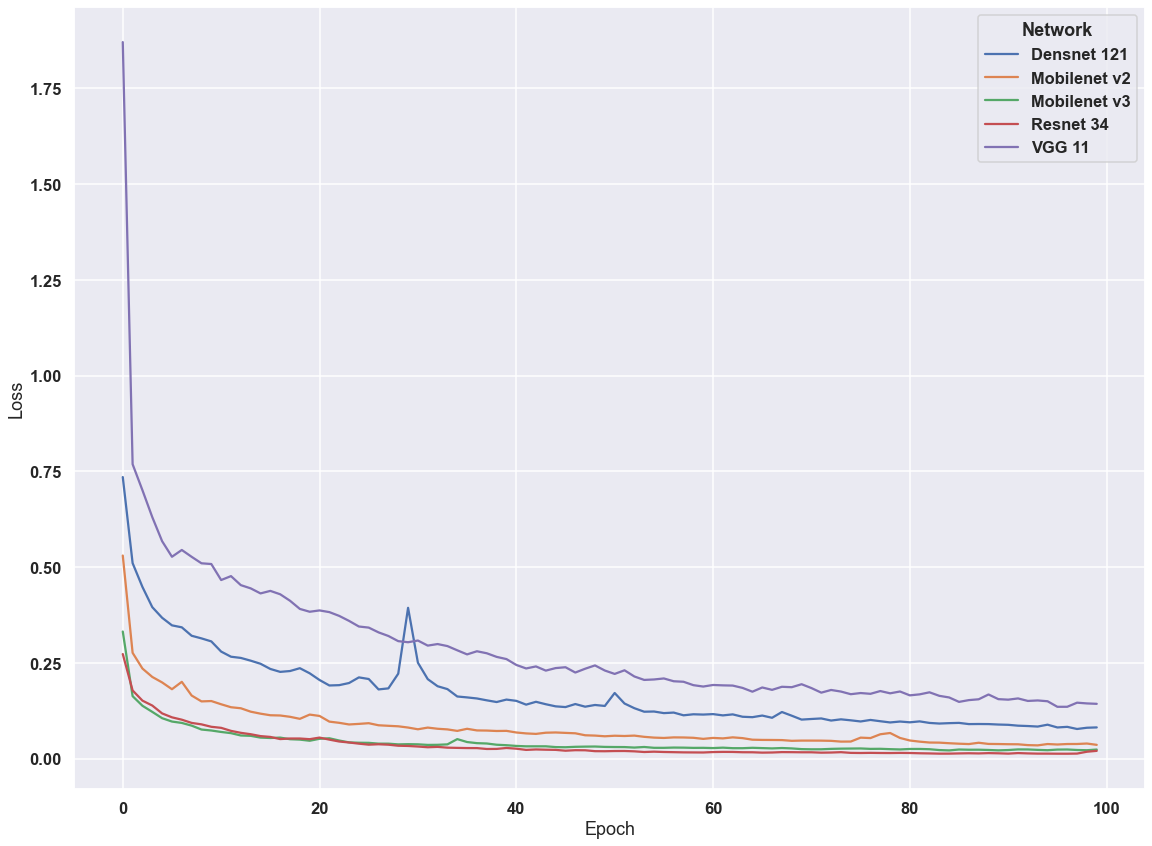

In [44]:
import json, os
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["figure.figsize"] = [6.4*3,4.8*3]

font = {'family' : 'normal',
  'size' : 72}

mpl.rc('font', **font)

sns.set_theme("talk")

jsonFiles = [x for x in os.listdir(".") if x.startswith("run-") and x.endswith("train.json")]
names = ["Densnet 121","Mobilenet v2","Mobilenet v3","Resnet 34","VGG 11"]
jsonDict = {}

for jF,nam in zip(jsonFiles,names):
    with open(jF,"r") as f:
        jsonList = json.load(f)
        jsonList = [x[2] for x in jsonList]
    jsonDict[nam] = jsonList

df = {"Loss":[],"Epoch":[],"Network":[]}

for jF,nam in zip(jsonFiles,names):
    df["Loss"].extend(jsonDict[nam][:100])
    df["Epoch"].extend(np.arange(0,100,1))
    df["Network"].extend([nam]*100)

df = pandas.DataFrame(df)

sns.lineplot(data=df,x="Epoch",y="Loss",hue="Network")
plt.show()

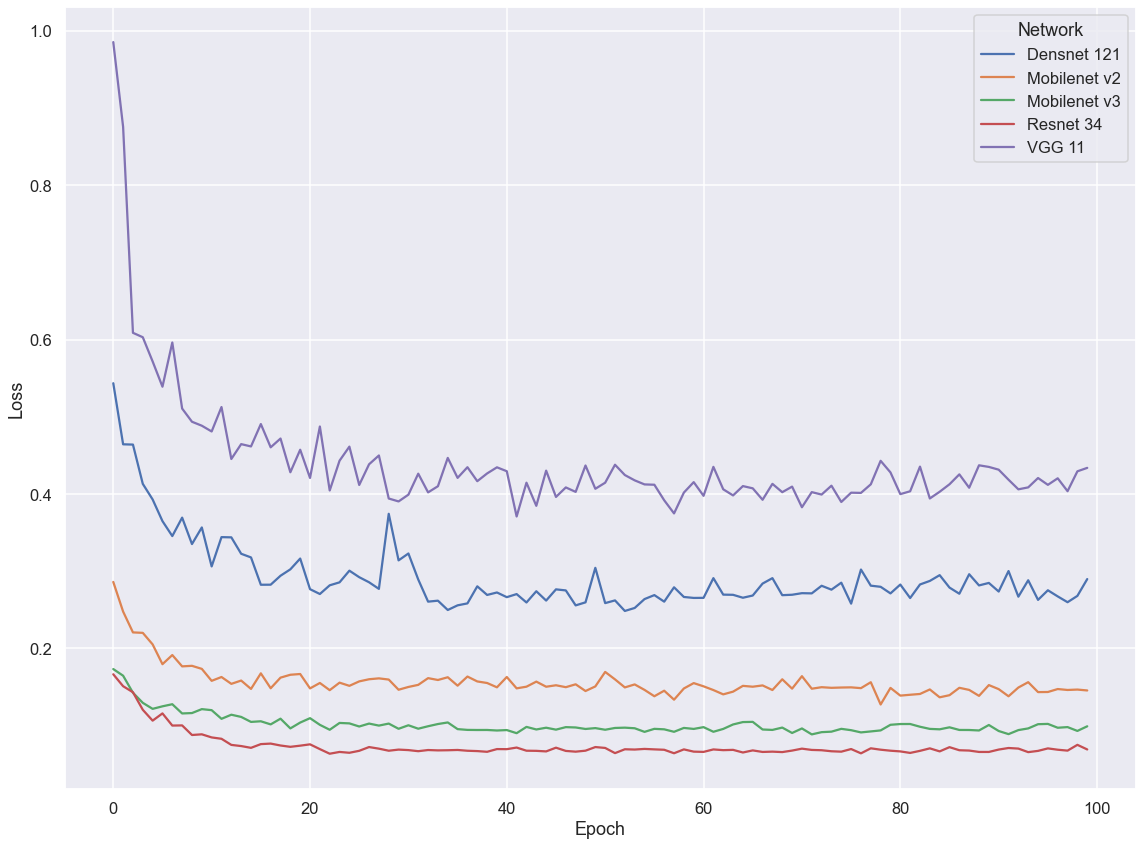

In [34]:
import json, os
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6.4*3,4.8*3]
sns.set_theme("talk")

jsonFiles = [x for x in os.listdir(".") if x.startswith("run-") and x.endswith("validation.json")]
names = ["Densnet 121","Mobilenet v2","Mobilenet v3","Resnet 34","VGG 11"]
jsonDict = {}

for jF,nam in zip(jsonFiles,names):
    with open(jF,"r") as f:
        jsonList = json.load(f)
        jsonList = [x[2] for x in jsonList]
    jsonDict[nam] = jsonList

df = {"Loss":[],"Epoch":[],"Network":[]}

for jF,nam in zip(jsonFiles,names):
    df["Loss"].extend(jsonDict[nam][:100])
    df["Epoch"].extend(np.arange(0,100,1))
    df["Network"].extend([nam]*100)

df = pandas.DataFrame(df)

sns.lineplot(data=df,x="Epoch",y="Loss",hue="Network")
plt.show()